# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
import gmaps
import json
import requests
from api_keys import api_key
from api_keys import g_key
import random
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Access maps with unique API key
gmaps.configure(api_key=g_key)

## Generate Cities List

In [3]:
# Import cities file as DataFrame
cities_pd = pd.read_csv("worldcities.csv")
cities_pd.head(100)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
95,Johannesburg,Johannesburg,-26.1700,28.0300,South Africa,ZA,ZAF,Gauteng,admin,3435000.0,1710550792
96,Berlin,Berlin,52.5218,13.4015,Germany,DE,DEU,Berlin,primary,3406000.0,1276451290
97,Algiers,Algiers,36.7631,3.0506,Algeria,DZ,DZA,Alger,primary,3354000.0,1012973369
98,Rome,Rome,41.8960,12.4833,Italy,IT,ITA,Lazio,primary,3339000.0,1380382862


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
cities = cities_pd["city_ascii"]

lat = []
lng = []

temper = []
hum = []
cloud = []
speed = []



nor_lat = []
nor_hum = []
nor_temper = []
nor_cloud = []
nor_speed = []

sou_lat = []
sou_hum = []
sou_temper = []
sou_cloud = []
sou_speed = []

units = "metric"
impl = "imperial"
query_url = f"{url}appid={api_key}&units={impl}&q="



### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_pd.head(100)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
95,Johannesburg,Johannesburg,-26.1700,28.0300,South Africa,ZA,ZAF,Gauteng,admin,3435000.0,1710550792
96,Berlin,Berlin,52.5218,13.4015,Germany,DE,DEU,Berlin,primary,3406000.0,1276451290
97,Algiers,Algiers,36.7631,3.0506,Algeria,DZ,DZA,Alger,primary,3354000.0,1012973369
98,Rome,Rome,41.8960,12.4833,Italy,IT,ITA,Lazio,primary,3339000.0,1380382862


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
#  Get the indices of cities that have humidity over 100%.

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#by default all humidity are less than 100
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temper.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        speed.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        if (response['coord']['lat'] >= 0 ):
            nor_lat.append(response['coord']['lat'])
            nor_temper.append(response['main']['temp'])
            nor_hum.append(response['main']['humidity'])
            nor_speed.append(response['wind']['speed'])
            nor_cloud.append(response['clouds']['all'])            
        else:
            sou_lat.append(response['coord']['lat'])
            sou_temper.append(response['main']['temp'])
            sou_hum.append(response['main']['humidity'])
            sou_speed.append(response['wind']['speed'])
            sou_cloud.append(response['clouds']['all'])  
    except:
        pass
    

In [16]:
print(f' length of nor temp {len(nor_lat)}')
print(f' length of nor temp {len(nor_temper)}')
print(f' length of nor nor_hum {len(nor_hum)}')
print(f' length of nor nor_speed {len(nor_speed)}')
print(f' length of nor nor_cloud {len(nor_cloud)}')
print(f' length of sou temp {len(sou_lat)}')
print(f' length of sou temp {len(sou_temper)}')
print(f' length of sou sou_hum {len(sou_hum)}')
print(f' length of sou sou_speed {len(sou_speed)}')
print(f' length of sou sou_cloud {len(sou_cloud)}')
      

 length of nor temp 2470
 length of nor temp 2470
 length of nor nor_hum 2470
 length of nor nor_speed 2470
 length of nor nor_cloud 2470
 length of sou temp 408
 length of sou temp 408
 length of sou sou_hum 408
 length of sou sou_speed 408
 length of sou sou_cloud 408


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

C:\ravi\anaconda3\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


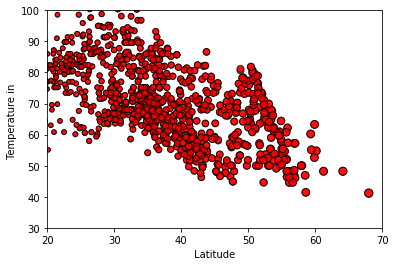

In [17]:
#This is for temperature vs latitude
x_limit = 100
x_axis = lat
data = temper
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(30, 100)
plt.xlim(20,70)
plt.xlabel(" Latitude ")
plt.ylabel(" Temperature in  ")
plt.savefig("../output_img/temp_vs_latitude.png")
plt.show()

## Latitude vs. Humidity Plot

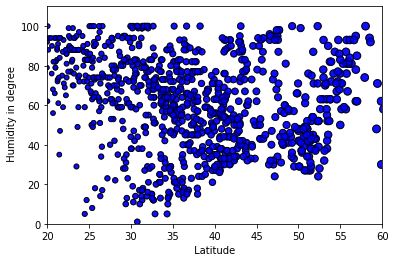

In [18]:
#This is for humidity vs latitude
x_limit = 100

x_axis = lat

data = hum
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(0, 110)
plt.xlim(20,60)
plt.xlabel(" Latitude ")
plt.ylabel(" Humidity in degree")
plt.savefig("../output_img/humidity_vs_latitude.png")
plt.show()

## Latitude vs. Cloudiness Plot

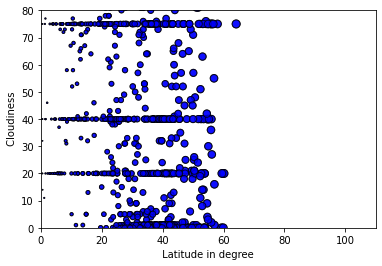

In [19]:
#This is for cloudiness vs latitude
x_limit = 100

x_axis = lat

data = cloud
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(0, 80)
plt.xlim(0,110)
plt.xlabel(" Latitude in degree ")
plt.ylabel(" Cloudiness")
plt.savefig("../output_img/cloudiness_vs_latitude.png")
plt.show()

## Latitude vs. Wind Speed Plot

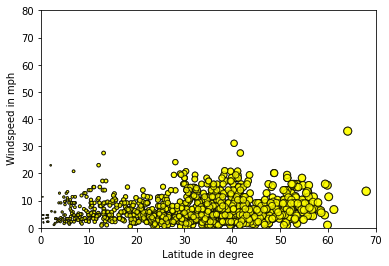

In [20]:
#This is for windspeed(mph) vs latitude
x_limit = 100

x_axis = lat

data = speed
plt.scatter(x_axis, data, marker="o", facecolors="yellow", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(0, 80)
plt.xlim(0,70)
plt.xlabel(" Latitude in degree ")
plt.ylabel(" Windspeed in mph")
plt.savefig("../output_img/windspeed_vs_latitude.png")
plt.show()

## Linear Regression

In [21]:
weather_dict = {
    "lat": nor_lat,
    "temp": nor_temper
}
weather_data = pd.DataFrame(weather_dict)
weather_data["temp"]

0       73.92
1       58.60
2       59.00
3       82.40
4       91.40
        ...  
2465    91.40
2466    94.57
2467    70.59
2468    88.43
2469    58.68
Name: temp, Length: 2470, dtype: float64

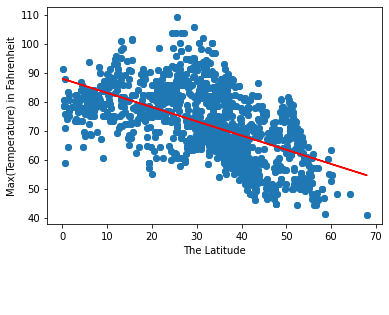

 The linear regression is y = -0.49x + 88.05


In [22]:
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Temperature) in Fahrenheit')
plt.savefig("../output_img/northern_max_temp_vs_latitude.png")
plt.show()
print(f' The linear regression is {line_eq}')


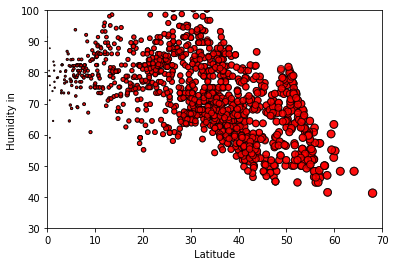

In [23]:
#This is for temperature vs latitude
x_limit = 100
x_axis = nor_lat
data = nor_temper
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(30, 100)
plt.xlim(0,70)
plt.xlabel(" Latitude ")
plt.ylabel(" Humidity in  ")
plt.savefig("../output_img/northern_temp_vs_latitude.png")
plt.show()

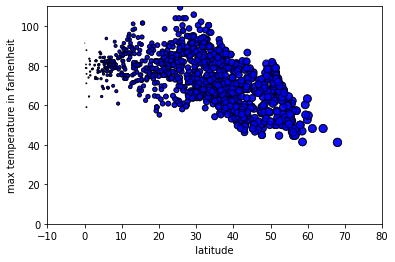

In [24]:
# max temperature vs latitude
x_limit = 100

x_axis = lat_data

data = max_temp
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylim(0, 110)
plt.xlim(-10,80)
plt.xlabel(" latitude ")
plt.ylabel("max temperature in farhenheit")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

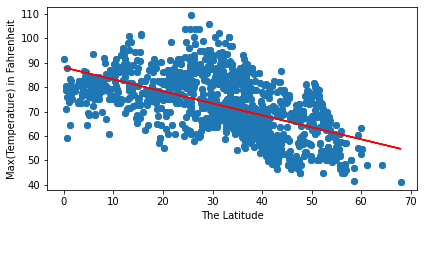

The r-squared is: 0.31688423199489396
 The linear regression is y = -0.49x + 88.05


In [26]:
#Max temperature vs Latitude, the linear regression is provided as print statement in Northen hemisphere
weather_dict = {
    "lat": nor_lat,
    "temp": nor_temper
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Temperature) in Fahrenheit')
plt.savefig("../output_img/northern_max_temp_vs_latitude.png")
plt.tight_layout()
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

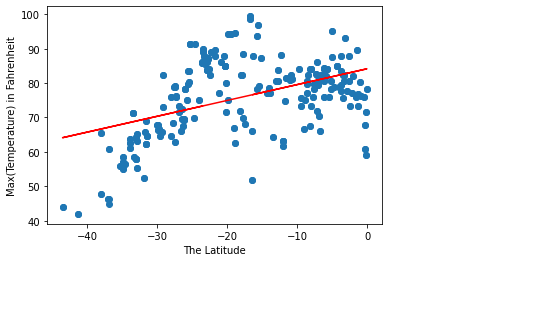

The r-squared is: 0.21594850719494046
 The linear regression is y = 0.46x + 84.16


In [27]:
#Max temperature vs Latitude, the linear regression is provided as print statement for southern hemisphere
weather_dict = {
    "lat": sou_lat,
    "temp": sou_temper
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Temperature) in Fahrenheit')
plt.savefig("../output_img/southern_max_temp_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

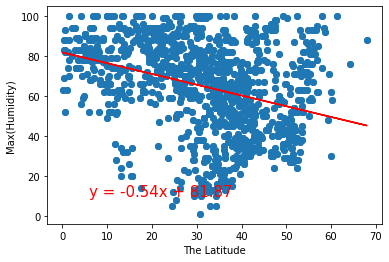

The r-squared is: 0.10823416157029721
 The linear regression is y = -0.54x + 81.87


In [28]:
#Max humidty vs Latitude, the linear regression is provided as print statement in Northen hemisphere
weather_dict = {
    "lat": nor_lat,
    "temp": nor_hum
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Humidity) ')
plt.savefig("../output_img/northern_max_humidity_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

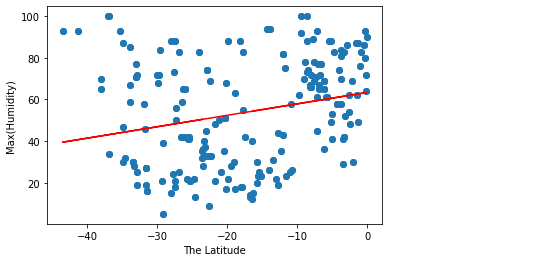

The r-squared is: 0.06045346736840828
 The linear regression is y = 0.55x + 63.38


In [29]:
#Max humidty vs Latitude, the linear regression is provided as print statement in Southern hemisphere
weather_dict = {
    "lat": sou_lat,
    "temp": sou_hum
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Humidity) ')
plt.savefig("../output_img/southern_max_humidity_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

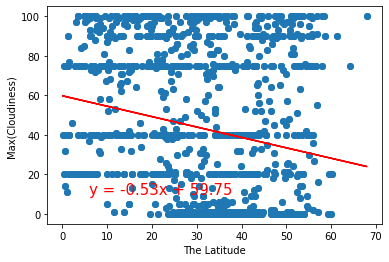

The r-squared is: 0.03774207394370248
 The linear regression is y = -0.53x + 59.75


In [30]:
#Max Cloudiness vs Latitude, the linear regression is provided as print statement in Northen hemisphere
weather_dict = {
    "lat": nor_lat,
    "temp": nor_cloud
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Cloudiness) ')
plt.savefig("../output_img/northern_max_cloudiness_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

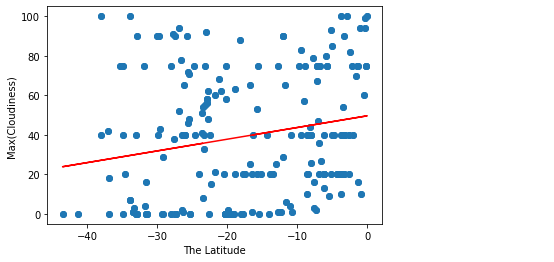

The r-squared is: 0.04286381578597233
 The linear regression is y = 0.59x + 49.62


In [31]:
#Max Cloudiness vs Latitude, the linear regression is provided as print statement in Southern hemisphere
weather_dict = {
    "lat": sou_lat,
    "temp": sou_cloud
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(Cloudiness) ')
plt.savefig("../output_img/southern_max_cloudiness_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

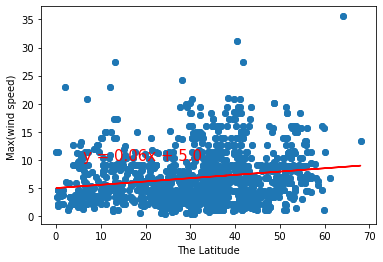

The r-squared is: 0.032723518656024755
 The linear regression is y = 0.06x + 5.0


In [32]:
#Max wind speed vs Latitude, the linear regression is provided as print statement in Northen hemisphere
weather_dict = {
    "lat": nor_lat,
    "temp": nor_speed
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(wind speed) ')
plt.savefig("../output_img/northern_max_windspeed_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

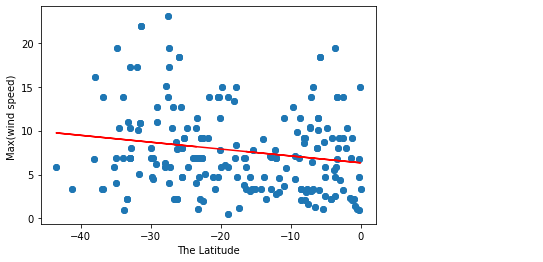

The r-squared is: 0.03335377498649948
 The linear regression is y = -0.08x + 6.33


In [33]:
#Max wind speed vs Latitude, the linear regression is provided as print statement in Southern hemisphere
weather_dict = {
    "lat": sou_lat,
    "temp": sou_speed
}
weather_data = pd.DataFrame(weather_dict)
max_temp = weather_data["temp"]
lat_data = weather_data["lat"]
x_values = lat_data
y_values = max_temp
(wea_slope, wea_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
wea_regress_values = x_values* wea_slope + wea_intercept
line_eq = "y = " + str(round(wea_slope,2)) + "x + " + str(round(wea_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,wea_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The Latitude')
plt.ylabel('Max(wind speed) ')
plt.savefig("../output_img/southern_max_windspeed_vs_latitude.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f' The linear regression is {line_eq}')